Graficación de Precios de Bolsa con ChatGPT
===

La url 'https://raw.githubusercontent.com/jdvelasq/datalabs/master/datasets/precio_bolsa_nacional/csv/*.csv' contiene los archivos de los precios horarios de bolsa para el mercado electrico colombiano. Construya una gráfica que contenga los precios promedios diarios y los precios promedios mensuales. 

![assets/repo_precios_bolsa.png](assets/repo_precios_bolsa.png)

Paso 1
---

**Prompt:** I want you to act as a python programmer assistant. 

Write the code to obtain the filenames in a github repo with owner="jdvelasq", repo="datalabs", 
and folder="datasets/precio_bolsa_nacional/csv/". 

Do not explain the code.

![assets/chatgpt-01.png](assets/chatgpt-01.png)

In [1]:
import requests

owner = "jdvelasq"
repo = "datalabs"
folder = "datasets/precio_bolsa_nacional/csv/"

url = f"https://api.github.com/repos/{owner}/{repo}/contents/{folder}"
response = requests.get(url)

filenames = [file["name"] for file in response.json()]
print(filenames)

['199507.csv', '199508.csv', '199509.csv', '199510.csv', '199511.csv', '199512.csv', '199601.csv', '199602.csv', '199603.csv', '199604.csv', '199605.csv', '199606.csv', '199607.csv', '199608.csv', '199609.csv', '199610.csv', '199611.csv', '199612.csv', '199701.csv', '199702.csv', '199703.csv', '199704.csv', '199705.csv', '199706.csv', '199707.csv', '199708.csv', '199709.csv', '199710.csv', '199711.csv', '199712.csv', '199801.csv', '199802.csv', '199803.csv', '199804.csv', '199805.csv', '199806.csv', '199807.csv', '199808.csv', '199809.csv', '199810.csv', '199811.csv', '199812.csv', '199901.csv', '199902.csv', '199903.csv', '199904.csv', '199905.csv', '199906.csv', '199907.csv', '199908.csv', '199909.csv', '199910.csv', '199911.csv', '199912.csv', '200001.csv', '200002.csv', '200003.csv', '200004.csv', '200005.csv', '200006.csv', '200007.csv', '200008.csv', '200009.csv', '200010.csv', '200011.csv', '200012.csv', '200101.csv', '200102.csv', '200103.csv', '200104.csv', '200105.csv', '2001

Paso 2
---

**Prompt:** I want you to act as a python programmer assistant. 

Write the code to read with pandas the CSV filenames in the master branch of the github repo with owner="jdvelasq", repo="datalabs", 
and folder="datasets/precio_bolsa_nacional/csv". Next, concatenate the dataframes. 

Do not explain the code.

![assets/chatgpt-02.png](assets/chatgpt-02.png)

In [2]:
import pandas as pd

owner = "jdvelasq"
repo = "datalabs"
folder = "datasets/precio_bolsa_nacional/csv/"

url = f"https://api.github.com/repos/{owner}/{repo}/contents/{folder}"
response = requests.get(url)

base_url = f"https://raw.githubusercontent.com/{owner}/{repo}/master/{folder}"

dfs = []
for file in response.json():
    file_url = base_url + file["name"]
    df = pd.read_csv(file_url)
    dfs.append(df)

df_concat = pd.concat(dfs, ignore_index=True)
print(df_concat.head())

        Fecha      0      1      2     3     4      5      6      7      8   
0  1995-07-21  1.073    1.0    1.0   1.0   1.0    1.0    5.0    6.0    6.0  \
1  1995-07-22  1.073  1.073    1.0   1.0   1.0  1.073  1.303  1.303  1.303   
2  1995-07-23  1.073    1.0    1.0   1.0   1.0    1.0    0.1    1.0    1.0   
3  1995-07-24    1.0    1.0   0.99   1.0   1.0  1.073    3.0    3.0    3.0   
4  1995-07-25   0.99   0.99  0.989  0.99  0.99  1.073  1.263  1.263  1.263   

   ...     14     15     16     17     18     19      20     21     22     23  
0  ...    5.0    1.0    1.0    5.0   12.0  16.67  11.929    5.0    1.0    1.0  
1  ...  1.073    1.0    1.0    1.0  1.303    2.5     2.5  1.303  1.073  1.073  
2  ...    1.0    0.1    0.1    1.0  1.238  1.238   1.238  1.238  1.073    1.0  
3  ...  1.073  1.073    3.0    2.0  18.63   22.5   9.256    3.0  1.073    1.0  
4  ...  1.073  1.073  1.073  1.073  1.263    1.5   1.263  1.263  1.073   0.99  

[5 rows x 25 columns]


Paso 3
---

**Prompt:** I want you to act as a python programmer assistant. 

The previous dataframe called "df_concat" contains the column "Fecha" represent a date with format "YYYY-MM-DD", and the columns "0" to "23" representing the hours of a day.
Write a code to generate a dataframe with columns "Fecha", hour, and value. 

Do not explain the code.

![assets/chatgpt-03.png](assets/chatgpt-03.png)

In [3]:
import pandas as pd

melted = pd.melt(
    df_concat, id_vars=["Fecha"], var_name="hour", value_name="value"
)
melted["hour"] = melted["hour"].astype(int)
print(melted.head())

        Fecha  hour  value
0  1995-07-21     0  1.073
1  1995-07-22     0  1.073
2  1995-07-23     0  1.073
3  1995-07-24     0    1.0
4  1995-07-25     0   0.99


Paso 4
----

**Prompt:** I want you to act as a python programmer assistant.

Write a code that transform the elements in column "value" of the previous dataframe, when they are of type str. Take into account that the values of type str use "." to represent thousands and "," to represent decimals.


Do not explain the code.

![assets/chatgpt-04.png](assets/chatgpt-04.png)

In [4]:
def str_to_float(x):
    if isinstance(x, str):
        x = x.replace(".", "").replace(",", ".")
        x = float(x)
    return x

melted["value"] = melted["value"].apply(str_to_float)
print(melted.head())

        Fecha  hour  value
0  1995-07-21     0  1.073
1  1995-07-22     0  1.073
2  1995-07-23     0  1.073
3  1995-07-24     0  1.000
4  1995-07-25     0  0.990


Paso 5
---

**Prompt:** I want you to act as a python programmer assistant.

Remove NA values from previous dataframe.

Do not explain the code.

![assets/chatgpt-05.png](assets/chatgpt-05.png)

In [5]:
melted.dropna(inplace=True)
print(melted.head())

        Fecha  hour  value
0  1995-07-21     0  1.073
1  1995-07-22     0  1.073
2  1995-07-23     0  1.073
3  1995-07-24     0  1.000
4  1995-07-25     0  0.990


Paso 6
---

**Prompt:** I want you to act as a python programmer assistant.

Create a dataframe called "precios_diarios" as the mean values of the column "value" of the previous dataframe grouped by "Fecha" column.

Do not explain the code.

![assets/chatgpt-06.png](assets/chatgpt-06.png)

In [6]:
precios_diarios = melted.groupby("Fecha")["value"].mean().reset_index()
print(precios_diarios.head())

        Fecha     value
0  1995-07-21  4.924333
1  1995-07-22  1.269500
2  1995-07-23  0.953083
3  1995-07-24  4.305917
4  1995-07-25  1.149167


Paso 7
---

**Prompt:** I want you to act as a python programmer assistant.

The column "Fecha" of the "melted" dataframe contains dates in the format "YYYY-MM-DD". Create a dataframe called "precios_mensuales" as the mean values of the column "value" of the "melted" dataframe grouped by year and month, using the transform method. The new dataframe conservs the "Fecha" column.

Do not explain the code.

![assets/chatgpt-07.png](assets/chatgpt-07.png)

In [7]:
melted["year_month"] = melted["Fecha"].apply(lambda x: x[:-3])
precios_mensuales = melted.groupby("year_month")["value"].transform("mean")
precios_mensuales = pd.concat([melted["Fecha"], precios_mensuales], axis=1)
print(precios_mensuales.head())

        Fecha     value
0  1995-07-21  1.552087
1  1995-07-22  1.552087
2  1995-07-23  1.552087
3  1995-07-24  1.552087
4  1995-07-25  1.552087


Paso 8
----

**Prompt:** I want you to act as a python programmer assistant.

Rename the column "value" in "precios_diarios" dataframe as "precio diario". Rename the column "value" in "precios_mensuales" dataframe as "precio mensual".

Do not explain the code.

![assets/chatgpt-08.png](assets/chatgpt-08.png)

In [8]:
precios_diarios = precios_diarios.rename(columns={"value": "precio diario"})
precios_mensuales = precios_mensuales.rename(columns={"value": "precio mensual"})

print(precios_diarios.head())
print(precios_mensuales.head())

        Fecha  precio diario
0  1995-07-21       4.924333
1  1995-07-22       1.269500
2  1995-07-23       0.953083
3  1995-07-24       4.305917
4  1995-07-25       1.149167
        Fecha  precio mensual
0  1995-07-21        1.552087
1  1995-07-22        1.552087
2  1995-07-23        1.552087
3  1995-07-24        1.552087
4  1995-07-25        1.552087


Paso 9
----

**Prompt:** I want you to act as a python programmer assistant.

Create a time plot using matplotlib with the column "precio diario" of "precios_diarios" dataframe, and the column "precio mensual" of "precios_mensuales" dataframe.  FixedFormatter should only used with FixedLocator.

Do not explain the code.

![assets/chatgpt-09.png](assets/chatgpt-09.png)

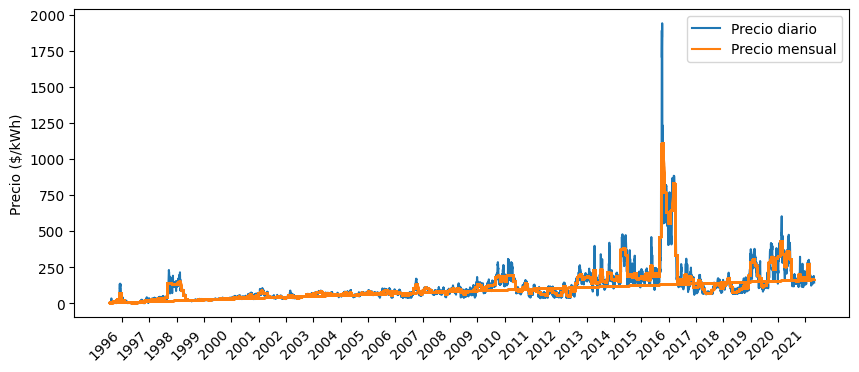

In [9]:
import matplotlib.pyplot as plt

precios_diarios["Fecha"] = pd.to_datetime(precios_diarios["Fecha"])
precios_mensuales["Fecha"] = pd.to_datetime(precios_mensuales["Fecha"])

precios_diarios = precios_diarios.set_index("Fecha")
precios_mensuales = precios_mensuales.set_index("Fecha")

fig, ax = plt.subplots(figsize=(10, 4))
ax.plot(precios_diarios["precio diario"], label="Precio diario")
ax.plot(precios_mensuales["precio mensual"], label="Precio mensual")

years = pd.date_range(start=precios_diarios.index.min(), end=precios_diarios.index.max(), freq='YS')
ax.set_xticks(years)
ax.set_xticklabels(years.strftime('%Y'), rotation=45, ha='right')

ax.set_ylabel("Precio ($/kWh)")
ax.legend()

plt.show()